# Final Report  - Time Series Project

Tarrence Nichols and Nathan Sharick - Innis Cohort

---

### Project Description

- The marketing team for our superstore is looking to lanch a new marketig campaign soon as has asked the data science department to analyze the company's customer and order data to help them develop an effective campaign. They have asked our department to recommend specific target areas or target groups to focus on with their project.

### Project Goals

- Goal 1: Identify marketing targets within the company's product lines

- Goal 2: Identify marketing targets within the company's customer base

- Goal 3: Make marketing recommendations from the results of our analysis

- Goal 4: Provide insight to next steps for target exploration and marketing focus

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from acquire import get_superstore_df
from acquire import clean_superstore_df

### Acquire, Clean, and Wrangle the dataset

- All data acquisition and data wrangling functions are located in the accompanying acquire.py file

- The get_superstore_df function first checks to see if there is a copy of the dataset save in the local directory. If there is is will read the .csv file into the notebook for use. If there is not a local saved copy it will execute a SQL query to pull the dataset from the CodeUp cloud database and read it into the notebook. It will also save a local copy after pulling in the dataset.

- The clean_superstore_df takes in the acquired dataset and first renames the columns so the column names can be used easily in the python code. Then it takes the order date column and changes it to a datetime data type and sets the order date as the dataframe index. Next it creates some new columns to be used in analysis and visualizations including a shipping time column, a unit cost column, a profit margin column, and a revenue column. Lastly it drops columns that represented foregin keys in the SQL database but are not needed for this project once the dataset has been pulled.



In [2]:
#acquire the dataset using the get_superstore_df function
df = get_superstore_df()
#complete initial cleaning and wrangling of the dataset with the clean_superstore_df function
df = clean_superstore_df(df)

Copying to CSV...


In [3]:
df.head()

,product_id,customer_id,order_id,order_date,ship_date,ship_mode,segment,country,city,state,...,profit,category,sub_cat,cust_name,prod_name,region,ship_time,unit_cost,profit_margin,revenue
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,OFF-LA-10003223,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,...,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,4 days,2.5041,0.453125,9.4272
2014-01-04,OFF-ST-10002743,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,...,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,4 days,112.5036,-0.296875,218.1888
2014-01-04,OFF-BI-10004094,PO-19195,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,Home Office,United States,Naperville,Illinois,...,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,4 days,4.5135,-7.750000,0.7080
2014-01-09,TEC-AC-10001266,MS-17830,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,...,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,4 days,7.1500,0.390625,24.9600
2014-01-09,OFF-AR-10004078,MS-17830,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,Consumer,United States,Laredo,Texas,...,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4 days,4.0880,0.156250,7.4752


---

In [6]:
# Create separate dfs for product categories
furniture = df.copy()[df.category ==  'Furniture']
ofc_supplies = df.copy()[df.category == 'Office Supplies']
tech = df.copy()[df.category == 'Technology']

### Exploration of Products

- Overall profit margin for the company is -16.4%. Profit margins for the Furniture and Office Supplies are in the red. Technology products are the company's sole profitable category. Sales numbers for each product category follow suit.

- Possible strategies: Increase marketing efforts for Furniture and/or Office Supplies, OR focus marketing on Technology.



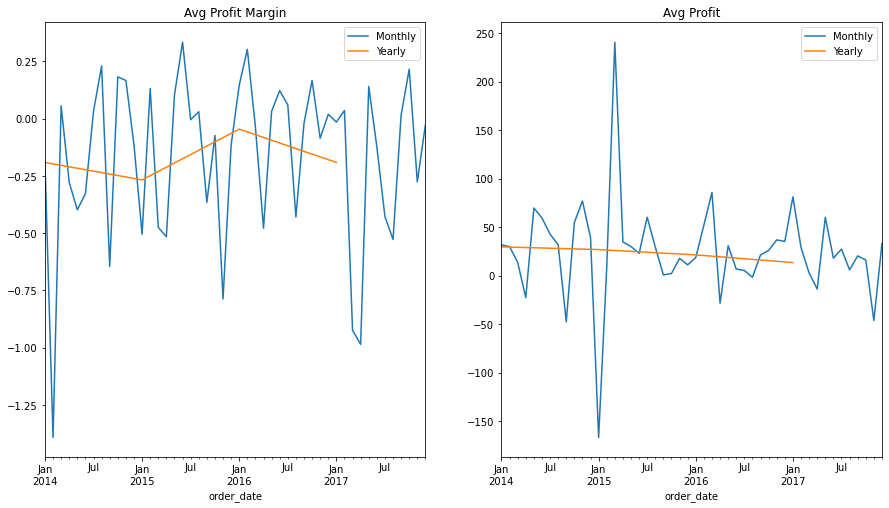

In [4]:
plt.figure(figsize=(15,8))
plt.subplot(121)
df.resample('M').profit_margin.mean().plot(label= 'Monthly')
df.resample('Y').profit_margin.mean().plot(label= 'Yearly')
plt.title('Avg Profit Margin')
plt.legend()

plt.subplot(122)
df.resample('M').profit.mean().plot(label= 'Monthly')
df.resample('Y').profit.mean().plot(label= 'Yearly')
plt.title('Avg Profit')
plt.legend()

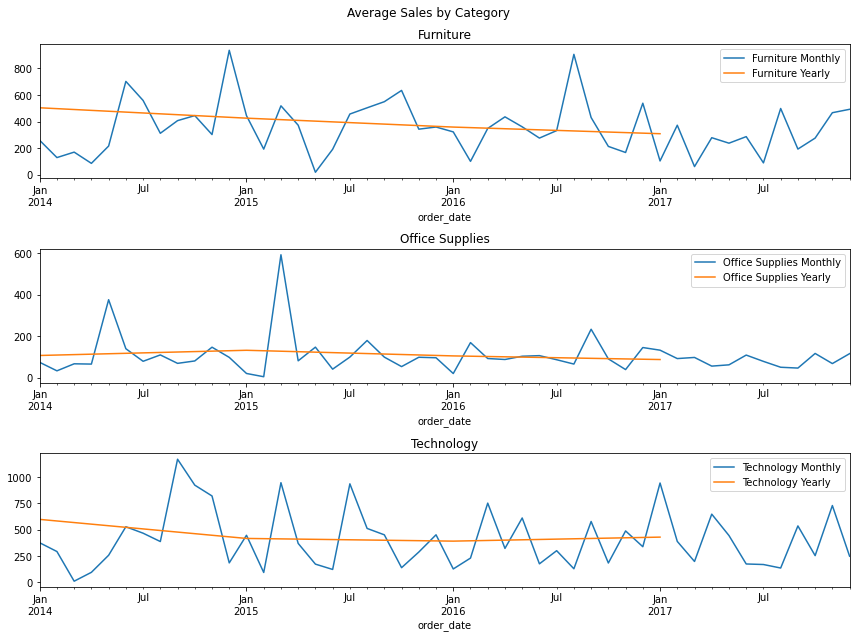

In [7]:
plt.figure(figsize=(12,9))

plt.suptitle('Average Sales by Category')

plt.subplot(311)
furniture.resample('M').sales.mean().plot(label= 'Furniture Monthly')
furniture.resample('Y').sales.mean().plot(label= 'Furniture Yearly')
plt.title('Furniture')
plt.legend()

plt.subplot(312)
ofc_supplies.resample('M').sales.mean().plot(label= 'Office Supplies Monthly')
ofc_supplies.resample('Y').sales.mean().plot(label= 'Office Supplies Yearly')
plt.title('Office Supplies')
plt.legend()

plt.subplot(313)
tech.resample('M').sales.mean().plot(label= 'Technology Monthly')
tech.resample('Y').sales.mean().plot(label= 'Technology Yearly')
plt.title('Technology')
plt.legend()

plt.tight_layout()

### Key Takeaways from Product Exploration

- takeaway 1...

- etc...

---

### Exploration of Regional Customer Data

- To better understand our customers and how to market to them we took a top down approach first looking at sales and order values by region and then, starting with the highest priorty region, analyzed individual customers to better understand their shopping and purchasing patterns

- Since we are looking at individual customer patterns we decided that the best approach was to focus on customer segmentation using a RFM analysis so that specific targeted marketing strategies could be developed.

In [7]:
#acquire the dataset with the get_superstore_df function
df = get_superstore_df()
#complete initial data cleaning/wrangling with the clean_superstore_df function
df = clean_superstore_df(df)
#seperate the dataset by region for regional and customer analysis
east = df[df.region == 'East'].copy()
west = df[df.region == 'West'].copy()
central = df[df.region == 'Central'].copy()
south = df[df.region == 'South'].copy()

Reading from CSV file...


#### Visualize yearly sales by region

- To understand which regions we should focus on we visualized yearly total sales and yearly average order value over time

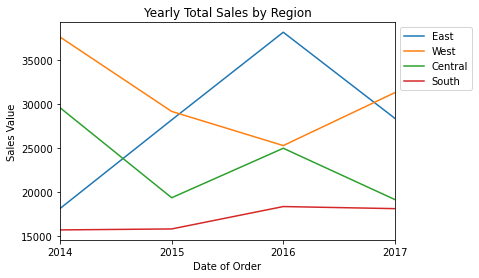

In [8]:
#single out the sales data for each region for visualizations
east_sales = east.sales
west_sales = west.sales
central_sales = central.sales
south_sales = south.sales
##Plot the total yearly sales by region
#plot each region as its own line
east_sales.resample('Y').sum().plot(label='East')
west_sales.resample('Y').sum().plot(label='West')
central_sales.resample('Y').sum().plot(label='Central')
south_sales.resample('Y').sum().plot(label='South')
#add a label to the x_axis
plt.xlabel('Date of Order')
#add a label to the y axis
plt.ylabel('Sales Value')
#add a title to the plot
plt.title('Yearly Total Sales by Region')
#add a legend to the plot
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

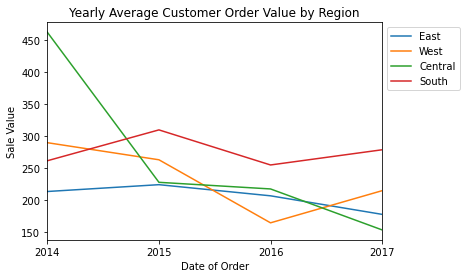

In [9]:
##Plot the average order value per year by region
#plot each region as its own line
east_sales.resample('Y').mean().plot(label='East')
west_sales.resample('Y').mean().plot(label='West')
central_sales.resample('Y').mean().plot(label='Central')
south_sales.resample('Y').mean().plot(label='South')
#add a label to the x axis
plt.xlabel('Date of Order')
#add a label to the y axis
plt.ylabel('Sale Value')
#add a title to the plot
plt.title('Yearly Average Customer Order Value by Region')
#add a legend to the plot
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

#### RFM Analysis (Recency, Frequency, Monetary)

- To better understand how to approach our customers in the central region with targeted marketing, we conducted a RFM analysis which evaluates how long its been since the customers last order, how many orders the customer has made, and what the total sales value of the customers orders were to segment them into focus groups.

In [10]:
##RFM Analysis##
#create a new dataframe with customer name and sales for all orders from the central region
central_cust_sales = central[['cust_name', 'sales']].copy()
#add a column that contains the data of the most recent order made by the customer
central_cust_sales['last_purchase'] = central_cust_sales['cust_name'].apply(lambda x: central_cust_sales[central_cust_sales['cust_name'] == x].index.max())
#set a 'today' variable to calculate how many days since the customers last order
today = pd.to_datetime('2017-12-30') 
#add a column for recency with the number of days since the customers last order
central_cust_sales['recency'] = central_cust_sales['last_purchase'].apply(lambda x: (today - x).days)
#add a column for frequency with the total number of orders the customer has made
central_cust_sales['frequency'] = central_cust_sales['cust_name'].apply(lambda x: central_cust_sales[central_cust_sales['cust_name'] == x].size)
#add a column for monetary with the total sales value for all that customers orders
central_cust_sales['monetary'] = central_cust_sales['cust_name'].apply(lambda x: central_cust_sales[central_cust_sales['cust_name'] == x].sales.sum())
#drop the sales and last purchase columns that were used to calculate the other columns
central_customer_rating = central_cust_sales.drop(columns=['sales', 'last_purchase'])
#group the dataframe by customer name to remove duplicate rows
central_customer_rating = central_customer_rating.groupby('cust_name').max()

#rank the customers in each of the three categories (recency, frequency, monetary)
central_customer_rating['r_rank'] = central_customer_rating['recency'].rank(ascending=False)
central_customer_rating['f_rank'] = central_customer_rating['frequency'].rank(ascending=True)
central_customer_rating['m_rank'] = central_customer_rating['monetary'].rank(ascending=True)
#normalize the rankings for overall scoring
central_customer_rating['r_rank_norm'] = (central_customer_rating['r_rank']/central_customer_rating['r_rank'].max())*100
central_customer_rating['f_rank_norm'] = (central_customer_rating['f_rank']/central_customer_rating['f_rank'].max())*100
central_customer_rating['m_rank_norm'] = (central_customer_rating['m_rank']/central_customer_rating['m_rank'].max())*100
#drop the original rank columns used for calculations
central_customer_rating.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

#calculate the customers rfm score
central_customer_rating['rfm_score'] = (0.15*central_customer_rating['r_rank_norm'])+(0.28*central_customer_rating['f_rank_norm'])+(0.57*central_customer_rating['m_rank_norm'])
#change the rfm score to a score between 0 and 5
central_customer_rating['rfm_score'] *= 0.05
#round the customers rfm score to 2 decimal places
central_customer_rating.rfm_score = central_customer_rating.rfm_score.round(2)

#add a column that groups customers into overall rating groups
central_customer_rating['overall_customer_rating'] = pd.cut(central_customer_rating.rfm_score, bins=[0, 1.6, 3, 4, 4.5, 5], labels=['lost customer', 'low value customer', 'moderate value customer', 'high value customer', 'top customer'])
#add a column that groups customers by recency ranking
central_customer_rating['recency_rating'] = pd.cut(central_customer_rating.recency, bins=[0, 180, 360, 1500 ], labels=['high', 'moderate', 'low'])
#add a column that groups customers by frequency rating
central_customer_rating['frequency_rating'] = pd.cut(central_customer_rating.frequency, bins=[0, 13, 23, 33], labels=['low', 'moderate', 'high'])
#add a column that groups customers by monetary rating
central_customer_rating['monetary_rating'] = pd.cut(central_customer_rating.monetary, bins=[0, 1000, 5000, 11000], labels=['low', 'moderate', 'high'])
#drop the normalized rank columns used to calculate customer groupings
central_customer_rating.drop(columns=['r_rank_norm', 'f_rank_norm', 'm_rank_norm'], inplace=True)
#view the resulting dataframe
central_customer_rating


,recency,frequency,monetary,rfm_score,overall_customer_rating,recency_rating,frequency_rating,monetary_rating
cust_name,,,,,,,,
Aimee Bixby,41,16,138.696,3.20,moderate value customer,high,moderate,low
Alan Dominguez,1100,4,600.558,2.62,low value customer,low,low,low
Alejandro Ballentine,552,4,13.616,0.94,lost customer,low,low,low
Alex Avila,184,8,374.480,3.29,moderate value customer,moderate,low,low
Alice McCarthy,532,8,57.240,1.96,low value customer,low,low,low
...,...,...,...,...,...,...,...,...
Tracy Blumstein,107,4,19.050,1.31,lost customer,high,low,low
Tracy Hopkins,187,12,564.380,3.79,moderate value customer,moderate,low,low
Troy Blackwell,285,4,2.910,0.90,lost customer,moderate,low,low


### Key Takeaways from Customer Exploration and Analysis

- The central region had the largest drop in total sales between the beginning of 2014 and the end of 2017 

- The central region also had the highest average order value in 2014 and the lowest average order value in 2017 compared to all other regions

- The above observations make the central region a priority for our marketing team's attention

- We have 1 customer with a "Top Customer" rating and and 16 customers with a "High Value Customer" rating in the central region meaning they have above a 4 for a rfm score

- We have 46 customers with a "High" recency rating meaning their last order was within the last 6 months

- We have 110 customers with a "Low" recency rating meaning they have not made an order in the last year

- We have 8 customers with a "High" frequency rating meaning they have made more than 23 orders with our company

- We have 2 customers with a "High" monetary rating meaning they have a total order value of more than $5000.00 with our company

- Each of the above customer groups represent a focus area for targeted marketing


---

### Summary

- point 1...

- The Central region should be a priority for marketing efforts since we have seen the largest decrease in sales and order value in that region

- Segmented customer groups were identified using a RFM Analysis for use with targeted marketing strategies

- Customer groupings resulting from the analysis are available as a csv file for use by the marketing department


### Marketing Recommendations

- **Recommendations based on product research**

    - Recomendation 1....
    
    - Recomendation 2...
    
- **Recommendations based on customer research**

    - Customers with a "Top Customer" or "High Value Customer" rating are our best customers and would most likely respond well to marketing focused on loyalty programs or early access to new products
    
    - Customers with a "High" frequency rating may not be the highest spending customers but they make purchases most often and would most likely respond well to marketing focused on free shipping or similar offers
    
    - Customers with a "High" monetary rating are our big spending customers and will most likely respond to marketing focused on luxury offers or higher level subscription tiers
    
    - Customers with a "High" recency rating have made an order with us in the last 6 months so we are on their mind and we should focus marketing on keeping us on their mind with new product announcements or recommendations based on their recent purchases
    
    - Customers with a "Low" recency rating have not made an order with us in the last year and are at risk of not coming back. they should be targeted with marketed focused on retention such as discount pricing or with specific customer engagement efforts
    

### Next Steps

- next step 1...

- If we had more time to analyze customer groups we would conduct a RFM analysis on the other 3 regions to identify focus groups for targeted marketing in those regions